In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import datasets
from sklearn import tree

In [6]:
cardio_train = pd.read_csv("Data/cardio_train.csv", delimiter=';')

In [7]:
cardio_train['age'] = (cardio_train['age']/365).apply(lambda x: int(x))





In [8]:
# ap_hi kan niet lager zijn dan ap_lo
cardio_train = cardio_train[:][cardio_train['ap_hi'] > cardio_train['ap_lo']]
cardio_train.shape

(68764, 13)

In [9]:
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
onafhankelijke = cardio_train[['age', 'gender', 'height' , 'weight', 'ap_hi', 'ap_lo' ,'cholesterol', 'gluc', 'smoke', 'alco', 'active' ]].copy()
afhankelijke = cardio_train['cardio'].copy()

onafhankelijke.head(4)

afhankelijke.head(4)

0    0
1    1
2    1
3    1
Name: cardio, dtype: int64

In [11]:
onafhankelijke

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [12]:
onafhankelijke_train, onafhankelijke_test, afhankelijke_train, afhankelijke_test = train_test_split(onafhankelijke, afhankelijke, test_size=0.3, random_state=42)

In [13]:
onafhankelijke.shape, onafhankelijke_train.shape, onafhankelijke_test.shape

((68764, 11), (48134, 11), (20630, 11))

In [14]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(onafhankelijke_train, afhankelijke_train)

In [15]:
f1_score(model.predict(onafhankelijke_test), afhankelijke_test, pos_label=1)

0.7171581769436997

In [16]:
confusion_matrix(afhankelijke_test, model.predict(onafhankelijke_test))

array([[8189, 2301],
       [3185, 6955]], dtype=int64)

In [17]:
def model_voor_decision_tree(kolomnamen):
    
    
    onafhankelijke_train, onafhankelijke_test, afhankelijke_train, afhankelijke_test = train_test_split(onafhankelijke, afhankelijke, test_size=0.3, random_state=42)
        
    
    model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(onafhankelijke_train, afhankelijke_train)
   
    
    f1 = f1_score(model.predict(onafhankelijke_test), afhankelijke_test, pos_label=1)
    cm = confusion_matrix(afhankelijke_test, model.predict(onafhankelijke_test))
    
    
    
    return f1, pd.DataFrame(cm, columns=[0 , 1] ,  index= [ 0 , 1 ])

In [18]:
f1, cm = model_voor_decision_tree(['cardio'])
f1

0.7171581769436997

In [19]:
cm

,0,1
0,8189,2301
1,3185,6955


In [20]:
cardio_train.drop_duplicates(inplace=True)
data = cardio_train


high_ap_filter = ((data["ap_hi"]>220) | (data["ap_lo"]>180))
data = data[~high_ap_filter]

low_ap_filter = ((data["ap_hi"] < 40) | (data["ap_lo"] < 40))
data = data[~low_ap_filter]

labels = data['cardio']

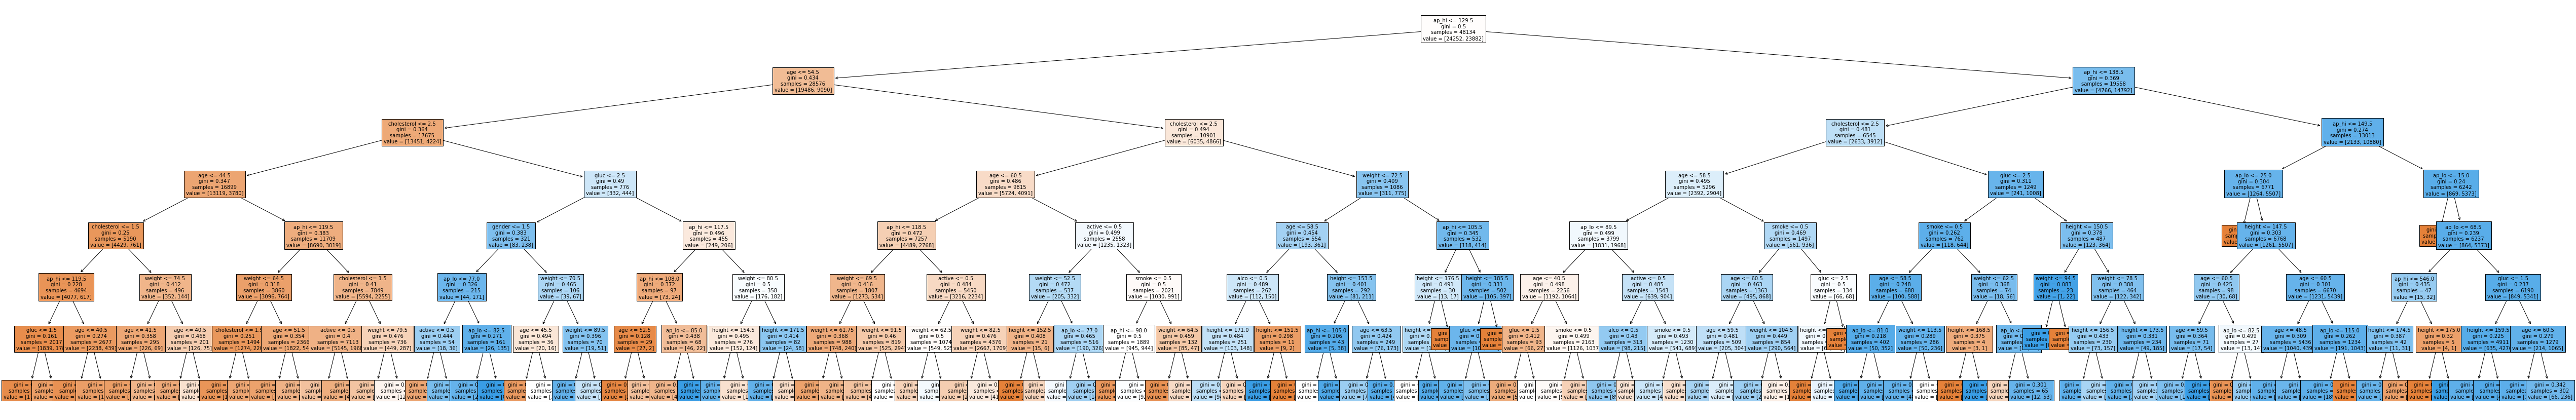

In [284]:

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(90,15))
_= tree.plot_tree(model,
                  fontsize =10 ,feature_names= onafhankelijke.columns,
                  filled =True)

In [21]:
acc_train = round(model.score(onafhankelijke_train,afhankelijke_train)*100, 4)
print("Accuracy van de training data: " + str(acc_train) + "%")

acc_test = round(model.score(onafhankelijke_test, afhankelijke_test)*100, 4)
print("Accuracy van de test data: " + str(acc_test) + "%")
print("Verschil: " + str(round(acc_test-acc_train,2)) + "%")

Accuracy van de training data: 73.4076%
Accuracy van de test data: 73.4077%
Verschil: 0.0%
